## Q1. e. Random Forest Classifier

###  n_estimators : [5,10,20,25,40,50]

- best suitable values for digit data of n_estimators is  **50**
    - accuracy score = **0.96** 
    - log loss = **0.2859** 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
digit_df = pd.read_csv('full_mnist_digits.csv')

In [3]:
X = digit_df.drop('label',axis=1)
y = digit_df['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=23, stratify=y)

### Desiginig the model


In [6]:
rf = RandomForestClassifier(random_state=23)

In [10]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [11]:
params = {'n_estimators' : [5,10,20,25,40,50]}

In [15]:
gcv_rf = GridSearchCV(rf, 
                      param_grid=params,
                      scoring='neg_log_loss',  
                      verbose=3)
gcv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................n_estimators=5;, score=-1.073 total time=   1.6s
[CV 2/5] END ...................n_estimators=5;, score=-0.993 total time=   1.5s
[CV 3/5] END ...................n_estimators=5;, score=-1.004 total time=   1.4s
[CV 4/5] END ...................n_estimators=5;, score=-1.018 total time=   1.4s
[CV 5/5] END ...................n_estimators=5;, score=-0.992 total time=   1.4s
[CV 1/5] END ..................n_estimators=10;, score=-0.506 total time=   2.6s
[CV 2/5] END ..................n_estimators=10;, score=-0.480 total time=   2.6s
[CV 3/5] END ..................n_estimators=10;, score=-0.462 total time=   2.6s
[CV 4/5] END ..................n_estimators=10;, score=-0.479 total time=   2.5s
[CV 5/5] END ..................n_estimators=10;, score=-0.473 total time=   2.5s
[CV 1/5] END ..................n_estimators=20;, score=-0.368 total time=   4.8s
[CV 2/5] END ..................n_estimators=20;, 

GridSearchCV(estimator=RandomForestClassifier(random_state=23),
             param_grid={'n_estimators': [5, 10, 20, 25, 40, 50]},
             scoring='neg_log_loss', verbose=3)

In [16]:
model_rf = gcv_rf.best_estimator_

In [28]:
print(f"best suitable values for digit data is ",gcv_rf.best_params_)

best suitable values for digit data is  {'n_estimators': 50}


### Accuracy score

In [17]:
y_pred = model_rf.predict(X_test)

In [18]:
y_pred_proba = model_rf.predict_proba(X_test)

In [21]:
loss = log_loss(y_test,y_pred_proba)
loss

0.2859456029383579

In [22]:
score = accuracy_score(y_test,y_pred)
score

0.9637222222222223

### Classification report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1777
           1       0.98      0.98      0.98      2023
           2       0.95      0.96      0.96      1787
           3       0.96      0.94      0.95      1839
           4       0.96      0.97      0.96      1753
           5       0.96      0.95      0.96      1626
           6       0.97      0.98      0.98      1775
           7       0.98      0.97      0.97      1880
           8       0.95      0.94      0.95      1755
           9       0.94      0.95      0.95      1785

    accuracy                           0.96     18000
   macro avg       0.96      0.96      0.96     18000
weighted avg       0.96      0.96      0.96     18000



### Confusion matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1757    0    4    1    1    1    5    0    7    1]
 [   0 1992   17    1    3    1    0    5    3    1]
 [   8    5 1719   12    6    3    6   10   12    6]
 [   4    1   27 1733    2   18    5   15   23   11]
 [   4    3    3    1 1693    1   11    2    6   29]
 [   7    2    5   28    5 1543   12    1   14    9]
 [   6    4    1    0    5   13 1743    0    3    0]
 [   1    6   19    3    9    0    0 1819    5   18]
 [   4   11    6   14   10   13   13    0 1654   30]
 [   7    2    8   16   30    7    0    9   12 1694]]


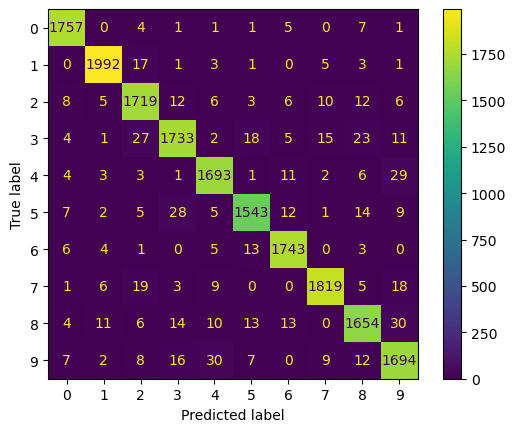

In [25]:
vis = ConfusionMatrixDisplay(confusion_matrix=cm)
vis.plot()
plt.show()